# Coloreado de grafos

## Alumnos

## Objetivo general

Programar un algoritmo de coloreado de vértices para grafos.

**Entrada**:
  - Grafo $G(Vértices, Aristas)$.
  - Número de colores.
  - Nombres de colores asignando el orden.

**Salida**:
  - Coloreado posible / Coloreado no posible
  - En caso de ser posible indicar la asignación de vértices con los colores asignados.
  - En caso de no ser posible, indicar el conflicto.
  - Presentar salida gráfica opcional.

## Algoritmo

1. Ordenar los vértices de $G$ por grado.
2. Para los nodos de grado igual, obtener su grado de error.
    - grado de error = $Grado + <Número de nodos adyacentes con grado igual o superior>$
    - Se ordenan por grado de error.
3. Se considera el orden de los colores a utilizar. El orden y el número de colores se determina al inicio del programa. En el siguiente ejemplo se muestran 4 colores con la prioridad siguiente.
    1. C1 = Blue (B)
    2. C2 = Red (R)
    3. C3 = Green (G)
    4. C4 = Yellow (Y)
4. Se colorean los nodos considerando el orden de prioridades de color y el acomodo dependiendo del grado de error del algoritmo.
5. Termina el algoritmo cuando todos los vértices son coloreados o cuando falta colorear algún vértice debido a la falta de colores.

## Dependencies

In [1]:
# Instala dependencies para este proyecto.
import sys
!conda install --yes --prefix {sys.prefix} networkx

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Erich\anaconda3

  added / updated specs:
    - networkx


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.9.30  |       haa95532_1         116 KB
    certifi-2021.10.8          |   py38haa95532_0         152 KB
    networkx-2.6.3             |     pyhd3eb1b0_0         1.3 MB
    ------------------------------------------------------------
                                           Total:         1.5 MB

The following packages will be UPDATED:

  ca-certificates                       2021.7.5-haa95532_1 --> 2021.9.30-haa95532_1
  certifi                          2021.5.30-py38haa95532_0 --> 2021.10.8-py38haa95532_0
  networkx                               2.6.2-pyhd3eb1b0_0 --> 2.6.3-pyhd3eb1b0_0




ca-certificates-2021 | 116 KB    |            |   0% 
ca-certificates-2021 

{(0, 3): Text(0.07812365666820895, -0.041494417093760894, '3'),
 (0, 6): Text(-0.08741303139502657, 0.2669091826784943, '3'),
 (1, 2): Text(0.301891016567083, -0.7969045810609058, '1'),
 (1, 3): Text(0.19153516717197988, -0.40101080349114127, '2'),
 (3, 9): Text(0.35635559725860877, -0.21938383225560976, '1'),
 (3, 5): Text(-0.07522961387802844, -0.17137698262373327, '1'),
 (4, 5): Text(-0.34143097608732315, 0.008426622941156536, '2'),
 (4, 6): Text(-0.290770732699903, 0.27999476047667393, '2'),
 (6, 7): Text(-0.27860529876795276, 0.5135066636456573, '3'),
 (6, 8): Text(-0.14090336612923327, 0.6360406987352469, '1')}

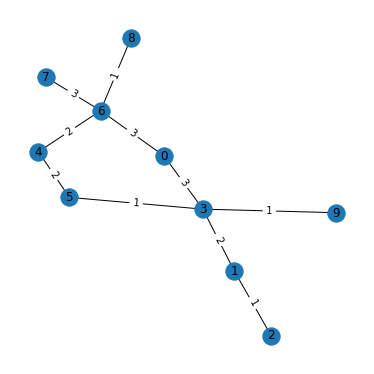

In [2]:
# Prueba de un grafo simple.
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(list(range(10)))
G.add_weighted_edges_from([(1,2,1), (1,3,2), (3,0,3), (3,9,1), (4,5,2), (6,7,3), (3,5,1), (4,6,2), (6,0,3), (6,8,1)])

fig = plt.figure(figsize=(5,5))
pos = nx.spring_layout(G, seed=2)
elabels = nx.get_edge_attributes(G,'weight')
nx.draw(G, with_labels=True, pos=pos)
nx.draw_networkx_edge_labels(G, pos,  edge_labels=elabels)

In [143]:
import random


# Lista de colores con nombre. Es una subconjunto de los colores
# soportados por pyplot.
COLORS = [
    'lightcoral',
    'crimson',
    'maroon',
    'yellowgreen',
    'red',
    'indigo',
    'lightsalmon',
    'chocolate',
    'peachpuff',
    'darkorange',
    'khaki',
    'lawngreen',
    'lightgreen',
    'aquamarine',
    'paleturquoise',
    'teal',
    'steelblue',
    'mediumpurple',
    'plum',
    'fuchsia',
    'hotpink']


class GraphColorizer():
    MAX_GRAPH_SIZE = 10

    def __init__(self, data=None, num_nodes=None, colors=[]):
        self.G = None
        self.input_colors = colors
        self.node_colors = colors
        if data is None:
            self._generate_random_graph()
        else:
            self.G = nx.Graph()
            self.G.add_nodes_from(list(range(num_nodes)))
            self.G.add_edges_from(data)


    def _generate_random_graph(self):
        """ Es código es de la clase de Análisis y Diseño de Algoritmos. Crea un
        grafo aleatorio con una probabilidad de tener aristas del 50% para cada
        vértice. La probabilidad se puede controlar con la variable `edge_prob`.
        """
        edge_prob = 50
        rand_size = random.randint(0, GraphColorizer.MAX_GRAPH_SIZE)
        self.G = nx.Graph()
        self.G.add_nodes_from(list(range(rand_size)))

        for i in range(rand_size):
            for j in range(i, rand_size):
                if i == j or random.randint(0, 100) > edge_prob:
                    continue
                _i, _j = [i, j] if i < j else [j, i]
                self.G.add_edge(_i, _j)

    def draw(self):
        if self.G is None:
            raise ValueError('Grafo no inicializado.')
        
        if len(self.node_colors) != len(self.G):
            # Si no se generó una lista de colores, solo dibujar el grafo con gris.
            self.node_colors = ["#999999"] * len(self.G)
        fig = plt.figure(figsize=(10,10))
        pos = nx.spring_layout(self.G, seed=2)
        elabels = nx.get_edge_attributes(G, 'Weight')
        nx.draw(self.G, node_color=self.node_colors, with_labels=True, pos=pos)
        nx.draw_networkx_edge_labels(self.G, pos, edge_labels=elabels)

    def _sort_vertices(self):
        # TODO: Hacer un segundo ordenamiento para considerar el error.
        return sorted(self.G, key=self.G.degree, reverse=True)

    def colorize(self):
        """ Aqui se ejecuta el algoritmo voraz para el coloreado. """

        # Se ordenan los vertices por grado.
        sorted_vertices = self._sort_vertices()

        # Se colorean los nodos considerando el orden de los colores.
        # print(f'Vertices ordenados: {sorted_vertices}')
        for vertex in sorted_vertices:
            # Para cada vertice, obtener la lista de vecinos que ya fueron coloreados.
            colored_neighbors = [n for n in self.G.neighbors(vertex) \
                if self.node_colors[n] is not None]
            # print(f'Vecinos coloreados: {colored_neighbors}')
            # Si el numero de vecinos coloreados es >= a los colores disponibles, entonces
            if len(colored_neighbors) >= len(self.node_colors):
                # levantar una excepcion, ya que no se puede colorear el grafo.
                raise Exception('No es posible colorear.')
            
            # Por cada color, verificar si el color ya fue asignado a alguno de los vertices.
            color_to_apply = None
            i_color = 0
            for _ in range(len(self.node_colors)):
                if i_color >= len(self.node_colors):
                    raise Exception('No es posible colorear')
                color_to_apply = self.input_colors[i_color]
                color_to_apply
                for neighbor in colored_neighbors:
                    if self.node_colors[neighbor] == self.input_colors[i_color]:
                        i_color += 1
                        continue

            if color_to_apply is None:
                raise Exception('No es posible colorear.')
            # Si el color no ha sido asignado, colorear este vertice. 
            self.node_colors[vertex] = color_to_apply


g = GraphColorizer(colors=['red', 'blue', 'green'])

#g = GraphColorizer(data=[(0, 4), (0, 5), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (3, 6), (4, 5), (4, 6)], \
#        num_nodes=7, \
#        colors=['red', 'blue', 'green'])

# [(0, 3), (0, 4), (0, 7), (0, 8), (1, 2), (1, 3), (1, 7), (2, 4), (2, 6), (2, 7), (3, 5), (4, 5), (4, 7), (5, 6), (6, 7), (6, 8)]

# Pruebas con el algoritmo que tiene la libreria networkx.
# Esto solo es una referencia, lo tenemos que implementar.
# colors = nx.coloring.greedy_color(g.G, strategy="largest_first")
# print(colors)

# g.node_colors = [None] * len(colors)
# for c in colors.items():
#     g.node_colors[c[0]] = c[1]

# distinct_colors = dict()

# for c in colors.values():
#     if c not in distinct_colors:
#         distinct_colors[c] = 0
#     else:
#         distinct_colors[c] += 1
# print(f'Colores usados: {len(distinct_colors)}')
#g.draw()





[(0, 1), (0, 3), (0, 4), (0, 6), (1, 2), (1, 3), (1, 5), (3, 5), (3, 6), (4, 7), (5, 7)]


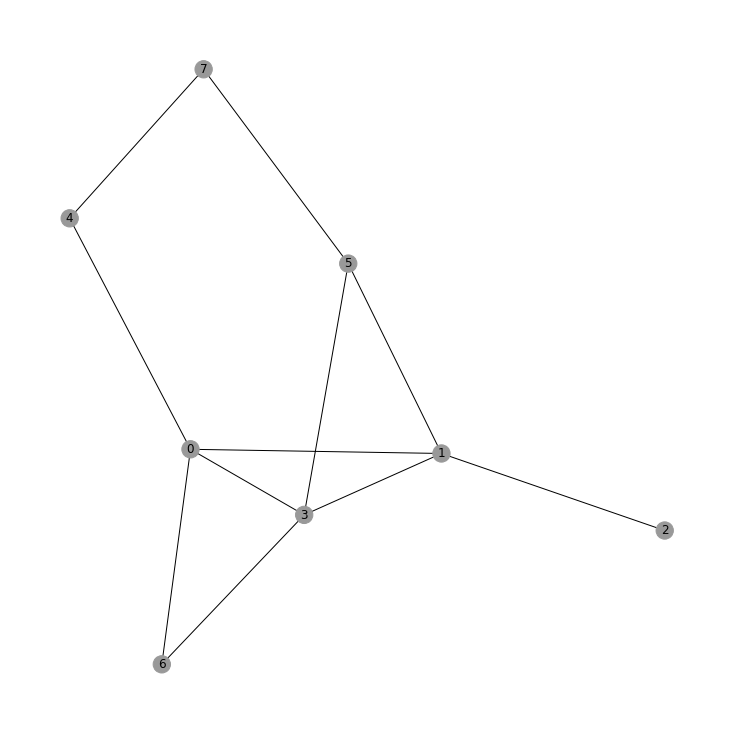

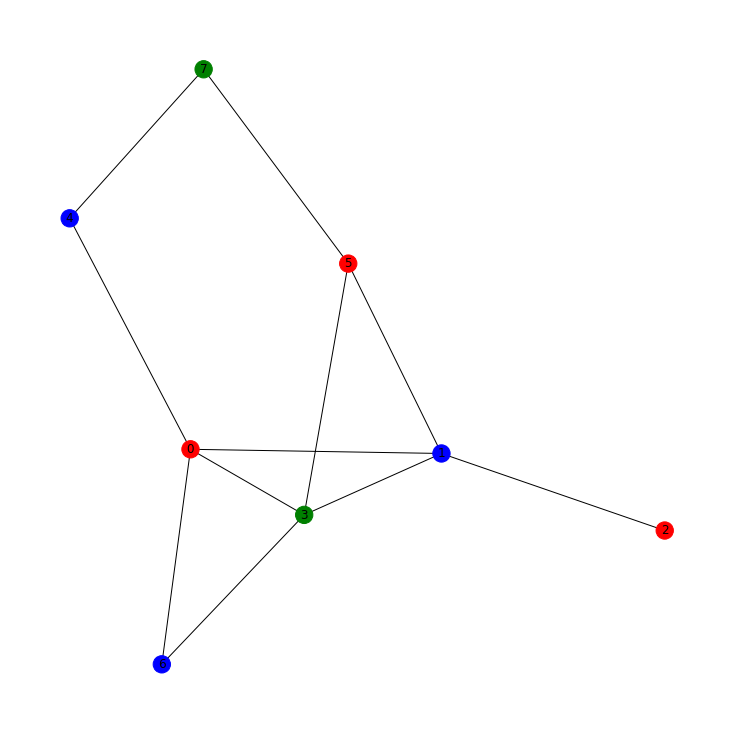

In [144]:
g.draw()
try:
    g.colorize()
except Exception as e:
    print(e)
g.draw()
print(g.G.edges)
